In [112]:
import pandas as pd
# Import Dataset
ue = pd.read_csv("C:/Users/eymoo/Documents/relax_challenge/takehome_user_engagement.csv")
u = pd.read_csv("C:/Users/eymoo/Documents/relax_challenge/takehome_users.csv")

In [113]:
from pandas_profiling import ProfileReport
prof_ue = ProfileReport(ue)
prof_ue.to_file(output_file='ue_output.html')

User Engagement Data (users with login timestamps) Overview

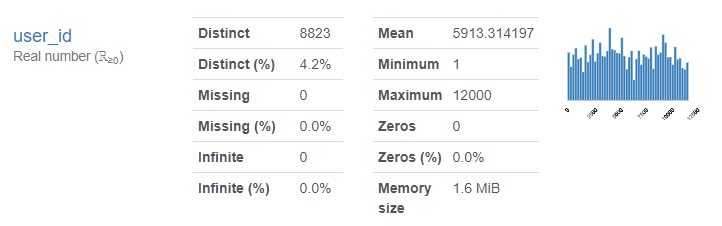

- Only 8823 users logged in after signups

In [111]:
ue.describe()

,user_id,visited,login_interval,Rolling_3_interval_sum
count,207917.000000,207917.0,199094.000000,194258.000000
mean,5913.314197,1.0,2.580078,7.176291
std,3394.941674,0.0,4.023636,7.684546
min,1.000000,1.0,1.000000,3.000000
25%,3087.000000,1.0,1.000000,3.000000
50%,5682.000000,1.0,1.000000,4.000000
75%,8944.000000,1.0,2.000000,8.000000
max,12000.000000,1.0,115.000000,138.000000


In [5]:
from pandas_profiling import ProfileReport
prof_u = ProfileReport(u)
prof_u.to_file(output_file='u_output.html')

Users Data Overview

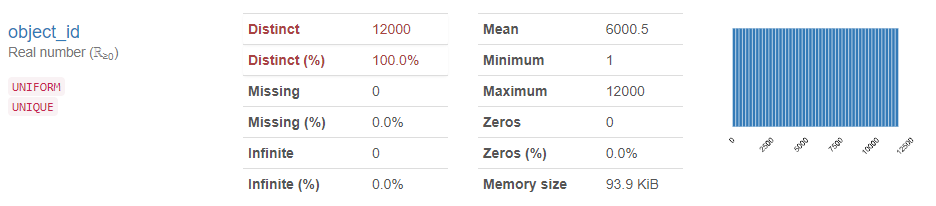
-Total 12000 Users

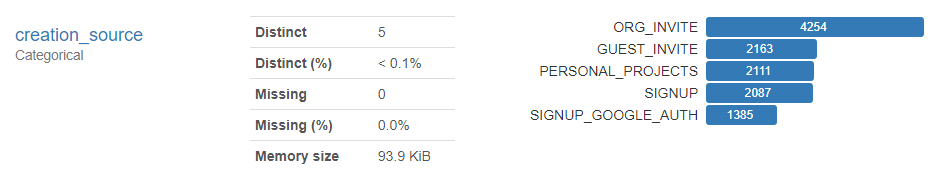
-Organic Invites are the most signup source

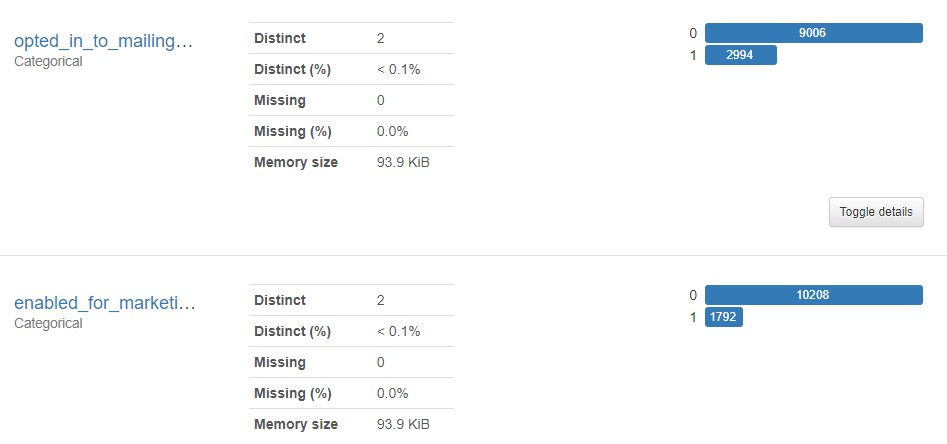
-Opted in for emailing and enabled for marketing dip has similar ratio


In [6]:
ue.head(5)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [114]:
ue.sort_values(["user_id", "time_stamp"], ascending = (False, True))

,time_stamp,user_id,visited
207916,2014-01-26 08:57:12,12000,1
207915,2012-06-02 11:55:59,11999,1
207914,2014-04-27 12:45:16,11998,1
207913,2013-01-15 18:28:37,11997,1
207912,2013-09-06 06:14:15,11996,1
...,...,...,...
11,2014-02-16 03:45:04,2,1
12,2014-03-09 03:45:04,2,1
13,2014-03-13 03:45:04,2,1
14,2014-03-31 03:45:04,2,1


In [115]:
# Make start datetime as date
import datetime as dt

ue['date'] = pd.to_datetime(ue['time_stamp']).dt.date

In [116]:
# Only interested in waiting time between the trip during the operating hour.
ue['next_login_starts_at'] = ue.groupby(['user_id'])['date'].shift(-1)

In [117]:
# Find the difference from now till next login
ue['login_interval']=((ue['next_login_starts_at']- ue['date']).astype('timedelta64[m]'))/1440

In [118]:
#If 3 of the login interval is equal or less than 7 at any point - then it means that the user was adopted
#let's get the first rolling 3 window sum of the login interval
ue['Rolling_3_interval_sum'] = ue['login_interval'].rolling(3).sum()

In [119]:
# Find the user_id that has Rolling_3_interval_sum less than 8 

ue_retained = ue[(ue['Rolling_3_interval_sum'] <= 7)]

In [120]:
ue_retained.head(5)

,time_stamp,user_id,visited,date,next_login_starts_at,login_interval,Rolling_3_interval_sum
30,2013-03-02 22:08:03,10,1,2013-03-02,2013-03-05,3.0,7.0
35,2013-03-20 22:08:03,10,1,2013-03-20,2013-03-22,2.0,7.0
40,2013-04-13 22:08:03,10,1,2013-04-13,2013-04-14,1.0,7.0
41,2013-04-14 22:08:03,10,1,2013-04-14,2013-04-17,3.0,6.0
42,2013-04-17 22:08:03,10,1,2013-04-17,2013-04-19,2.0,6.0


In [121]:
retained_user_list=ue_retained['user_id'].unique()

In [122]:
retained_user_df = pd.DataFrame({'object_id':retained_user_list})
retained_user_df['y_n']=1
print (retained_user_df)
# total 1339 Adopted users 

      object_id  y_n
0            10    1
1            42    1
2            43    1
3            53    1
4            63    1
...         ...  ...
1334      11965    1
1335      11967    1
1336      11969    1
1337      11975    1
1338      11988    1

[1339 rows x 2 columns]


Defining  an  "adopted  user"   as  a  user  who   has  logged  into  the  product  on  three  separate
days  in  at  least  one  seven­day  period ,  identify  which  factors  predict  future  user
adoption .

In [67]:
#ue.merge(retained_user_df, on='user_id', how='left').head(1)

In [68]:
#Let's investigate user table
u.head(5)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [98]:
u.describe()
# total 12000 users -- So about 11% users were adopted the product

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [131]:
#let's put the marker to identify who is retained user out of these user table
df=u.merge(retained_user_df, on='object_id', how='left')

In [132]:
df.head(12)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,y_n
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,NaN
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,NaN
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,NaN
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,NaN
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,NaN
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,NaN
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN,NaN
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN,NaN
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN,NaN
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,1.0


In [133]:
# Now EDA! 
#Create dummy variables
df3= pd.get_dummies(df, columns=['creation_source','opted_in_to_mailing_list','enabled_for_marketing_drip'])

# na -> fill with 0
df4=df3.fillna(0)

In [134]:
#lets remove correlated features
cor_matrix = df4.corr().abs()
print(cor_matrix)

                                    object_id  last_session_creation_time  \
object_id                            1.000000                    0.009651   
last_session_creation_time           0.009651                    1.000000   
org_id                               0.004110                    0.010231   
invited_by_user_id                   0.001657                    0.021160   
y_n                                  0.001434                    0.223422   
creation_source_GUEST_INVITE         0.006909                    0.000797   
creation_source_ORG_INVITE           0.003988                    0.023615   
creation_source_PERSONAL_PROJECTS    0.003357                    0.390789   
creation_source_SIGNUP               0.002692                    0.180927   
creation_source_SIGNUP_GOOGLE_AUTH   0.015089                    0.216649   
opted_in_to_mailing_list_0           0.032370                    0.010916   
opted_in_to_mailing_list_1           0.032370                    0.010916   

In [135]:
#Dropping high correlated features
    
import numpy as np
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.70)]
print(); print(to_drop)

                                    object_id  last_session_creation_time  \
object_id                                 NaN                    0.009651   
last_session_creation_time                NaN                         NaN   
org_id                                    NaN                         NaN   
invited_by_user_id                        NaN                         NaN   
y_n                                       NaN                         NaN   
creation_source_GUEST_INVITE              NaN                         NaN   
creation_source_ORG_INVITE                NaN                         NaN   
creation_source_PERSONAL_PROJECTS         NaN                         NaN   
creation_source_SIGNUP                    NaN                         NaN   
creation_source_SIGNUP_GOOGLE_AUTH        NaN                         NaN   
opted_in_to_mailing_list_0                NaN                         NaN   
opted_in_to_mailing_list_1                NaN                         NaN   

In [136]:
df5=df4.drop(columns=['opted_in_to_mailing_list_1','enabled_for_marketing_drip_1'])
df5.head(3)

,object_id,creation_time,name,email,last_session_creation_time,org_id,invited_by_user_id,y_n,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,opted_in_to_mailing_list_0,enabled_for_marketing_drip_0
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,1.398139e+09,11,10803.0,0.0,1,0,0,0,0,0,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,1.396238e+09,1,316.0,0.0,0,1,0,0,0,1,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,1.363735e+09,94,1525.0,0.0,0,1,0,0,0,1,1


In [ ]:
# There are still irrelevant field that won't impact the prediction. such as name, email,creation_time.. etc. Let's drop

In [137]:
df6=df5.drop(columns=['object_id','creation_time','name','email','last_session_creation_time','invited_by_user_id'])
df6.head(3)

,org_id,y_n,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,opted_in_to_mailing_list_0,enabled_for_marketing_drip_0
0,11,0.0,1,0,0,0,0,0,1
1,1,0.0,0,1,0,0,0,1,1
2,94,0.0,0,1,0,0,0,1,1


In [89]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df6)
prof.to_file(output_file='df6_output.html')

In [138]:
df6.describe()

,org_id,y_n,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,opted_in_to_mailing_list_0,enabled_for_marketing_drip_0
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,141.884583,0.111583,0.180250,0.354500,0.175917,0.173917,0.115417,0.750500,0.850667
std,124.056723,0.314866,0.384412,0.478381,0.380765,0.379054,0.319537,0.432742,0.356432
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,238.250000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,416.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#Time to make the first model 

#Import xgboost

In [139]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

y= df6['y_n']
X= df6.drop(columns=['y_n'])

# Create the training and test sets
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2,random_state=123)

from sklearn import preprocessing

# one-hot encode the categorical features
#cat_attribs=['new company or not','email_type','invited or not','Utm_Signup__Utm_Source']
#full_pipeline = ColumnTransformer([('cat', OneHotEncoder(handle_unknown='ignore'), cat_attribs)], remainder='passthrough')

#encoder = full_pipeline.fit(X_train)
#X_train = encoder.transform(X_train)
#X_test = encoder.transform(X_test)

# train the model
model = XGBRegressor(n_estimators=10, max_depth=20, verbosity=2)
model.fit(X_train, y_train)

# Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier(objective='binary:logistic', 
        n_estimators=10, seed=123)

# Fit the classifier to the training set
xg_cl.fit(X_train, y_train)

# Predict the labels of the test set: preds
preds = xg_cl.predict(X_test)

# Compute the accuracy: accuracy
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))

[11:23:22] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 1128 extra nodes, 0 pruned nodes, max_depth=20
[11:23:22] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 1420 extra nodes, 0 pruned nodes, max_depth=20
[11:23:22] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 1292 extra nodes, 0 pruned nodes, max_depth=20
[11:23:22] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 1680 extra nodes, 0 pruned nodes, max_depth=20
[11:23:22] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 1210 extra nodes, 0 pruned nodes, max_depth=20
[11:23:22] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 171

C:\Users\eymoo\Documents\Anaconda_real\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


#Logistic Regression ##

In [140]:
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('dark_background')
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from inspect import signature
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [141]:
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
logisticRegr =  LogisticRegression(solver='lbfgs', max_iter=1000)
logisticRegr.fit(X_train, y_train)

predictions = logisticRegr.predict(X_test)
y_pred = logisticRegr.predict(X_test)

precision_score(y_test, y_pred),recall_score(y_test, y_pred),f1_score(y_test, y_pred)

C:\Users\eymoo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.0, 0.0, 0.0)

0.8766666666666667


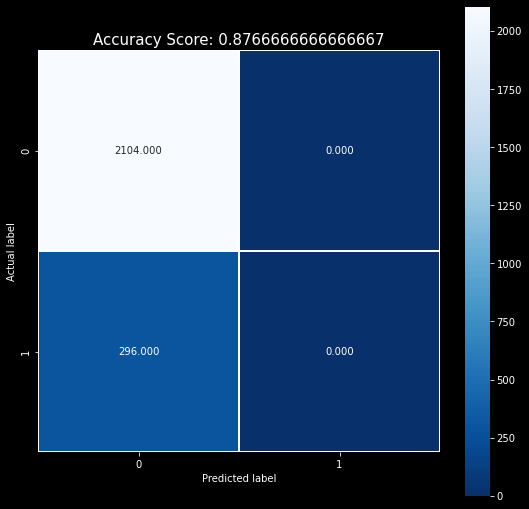

In [143]:
cm = pd.DataFrame(confusion_matrix(y_test, predictions))
#sns.heatmap(cm, annot=True)

# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print(score)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [144]:
log_odds = logisticRegr.coef_[0]

pd.DataFrame(log_odds, 
             X.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
enabled_for_marketing_drip_0,0.016998
org_id,0.001342
opted_in_to_mailing_list_0,-0.064976
creation_source_GUEST_INVITE,-0.069989
creation_source_SIGNUP_GOOGLE_AUTH,-0.126077
creation_source_SIGNUP,-0.219298
creation_source_ORG_INVITE,-0.371513
creation_source_PERSONAL_PROJECTS,-1.097921


In [145]:
odds = np.exp(logisticRegr.coef_[0])

pd.DataFrame(odds, 
             X.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
enabled_for_marketing_drip_0,1.017143
org_id,1.001343
opted_in_to_mailing_list_0,0.937090
creation_source_GUEST_INVITE,0.932404
creation_source_SIGNUP_GOOGLE_AUTH,0.881547
creation_source_SIGNUP,0.803082
creation_source_ORG_INVITE,0.689690
creation_source_PERSONAL_PROJECTS,0.333564


For odds less than 1 (our negative coefficients), we can take 1/odds to make even better sense of them. So as creation_source_PERSONAL_PROJECTS increases by 1, the odds that the house is NOT in the target class are 1/0.33 or 2.56x (ominous!) as likely as the odds that it IS in the target class.

It seems like the logistic regression is not working well due to imbalanced dataset (only 11% are adopted). 
So we will try other method like random forest

In [146]:
# importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

In [147]:
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('dark_background')
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from inspect import signature

In [148]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
  
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
probs = clf.predict_proba(X_test)
  
# metrics are used to find accuracy or error
from sklearn import metrics  
print()
  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.8458333333333333


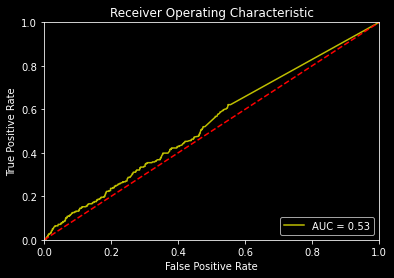

In [149]:
# ROC Curve 

churn_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, churn_probs)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [150]:
y_pred = clf.predict(X_test)
precision_score(y_test, y_pred),recall_score(y_test, y_pred),f1_score(y_test, y_pred)

(0.1810344827586207, 0.07094594594594594, 0.10194174757281554)

In [151]:
from sklearn.metrics import accuracy_score
predicted = clf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
print(f'Mean accuracy score: {accuracy:.3}')

Mean accuracy score: 0.846


<AxesSubplot:>

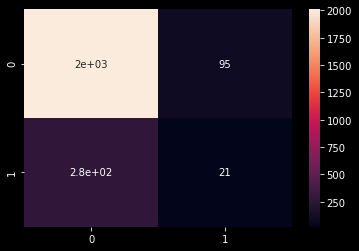

In [152]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = pd.DataFrame(confusion_matrix(y_test, predicted))
sns.heatmap(cm, annot=True)